## Looking at EOG data in comparison to ECoG data
Samantha Sun | 20201021

In [1]:
%matplotlib inline

# general use
import numpy as np
import h5py
from tqdm import tqdm
import scipy as sp

# plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
flatui = ["#417CA7", "#D93A46", "#2ecc71", "#ff9408", "#6a79f7", "#f075e6"]
sns.set_palette(sns.color_palette(flatui))

# custom functions here
import sys
sys.path.append("./../scripts/")
import filtering_tools as filt




In [2]:
day = 6
subj_id = 'a0f66459'
path = "/Users/sunh20/School/Research/sleep_class/"

In [3]:
# load raw data
filename = path + "DATA/" + subj_id + "/ecog/processed_" + subj_id + "_" + str(day) + ".h5"
fin = h5py.File(filename, "r")
print(list(fin.keys()))
ecog = fin.get('dataset')
fs = int(fin.get('f_sample')[()])
chan_label = fin.get('chanLabels')[()]
ch_good = fin.get('goodChanInds')[()]

['Kurt_channels', 'SD_channels', 'allChanArtifactInds', 'chanLabels', 'dataset', 'f_sample', 'goodChanInds', 'standardizeDenoms', 'start_timestamp', 'start_timestamp_nw']


In [4]:
ECOG = ecog[ch_good,].transpose();
print('ECOG_data:',ECOG.shape)

ECOG_data: (42764078, 88)


In [7]:
# import eog data - downsample to 500 Hz

filename = path + "DATA/" + subj_id + "/raw_ecg_eog/ECG_EOG_raw_" + str(day) + ".h5"
fin = h5py.File(filename, "r")
print(list(fin.keys()))
# ECG = fin.get('ECG')[0][::2]
EOG = fin.get('EOG')[0][::2]
# fs_eog = fin.get('f_sample')[()]
fs = 500

print('EOG shape: ', EOG.shape)


['ECG', 'EOG', 'f_sample']
EOG shape:  (42764078,)


In [8]:
t = np.arange(0,len(EOG)/fs,1/fs)
t.shape

(42764078,)

IndexError: too many indices for array

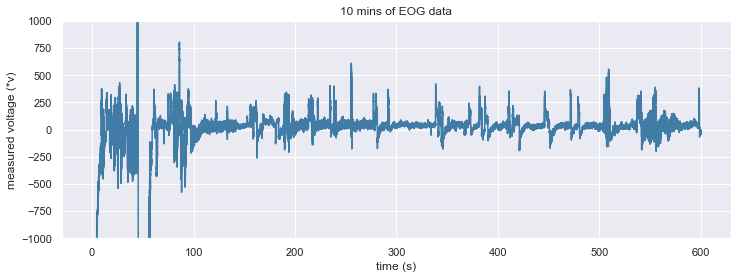

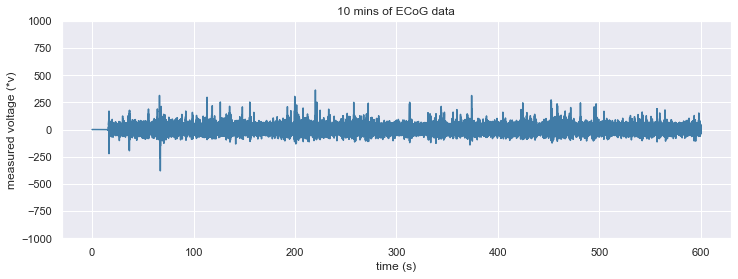

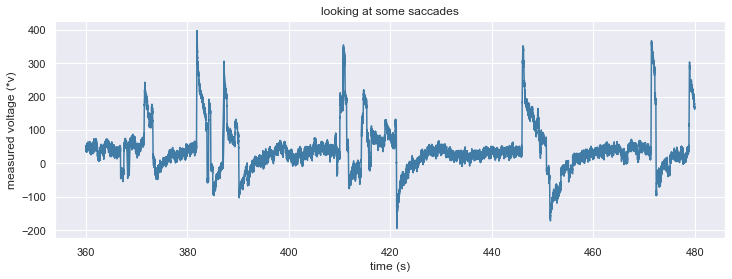

<Figure size 864x288 with 0 Axes>

In [11]:
plt.figure(figsize=[12,4])
plt.plot(t[:fs*60*10],EOG[:fs*60*10],label='EOG')
plt.ylim([-1000,1000])
plt.xlabel('time (s)')
plt.ylabel('measured voltage (*v)')
plt.title('10 mins of EOG data')

plt.figure(figsize=[12,4])
plt.plot(t[:fs*60*10],ECOG[:fs*60*10,0],label='ECoG')
plt.ylim([-1000,1000])
plt.xlabel('time (s)')
plt.ylabel('measured voltage (*v)')
plt.title('10 mins of ECoG data')

plt.figure(figsize=[12,4])
plt.plot(t[fs*60*6:fs*60*8],EOG[fs*60*6:fs*60*8],label='EOG')
plt.xlabel('time (s)')
plt.ylabel('measured voltage (*v)')
plt.title('looking at some saccades')

plt.figure(figsize=[12,4])
plt.plot(t[fs*60*6:fs*60*8],EOG[fs*60*6:fs*60*8,0],label='EOG')
plt.xlabel('time (s)')
plt.ylabel('measured voltage (*v)')
plt.title('ECoG - some saccades')